In [1]:
using Plots,LaTeXStrings
default(markersize=3,linewidth=1.5)
using DataFrames
using DifferentialEquations
include("FNC.jl");

# Example 6.1.2

The equation $u'=\sin[(u+t)^2]$ also has a solution that can be found numerically with ease, even though no formula exists for its solution. 

In [2]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

The `DifferentialEquations` package offers solvers for a huge variety of problems, including ordinary IVPs. Its syntax is more general (and powerful) than the one we will use to develop some simple solvers of our own. 

In [3]:
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
sol = solve(ivp);

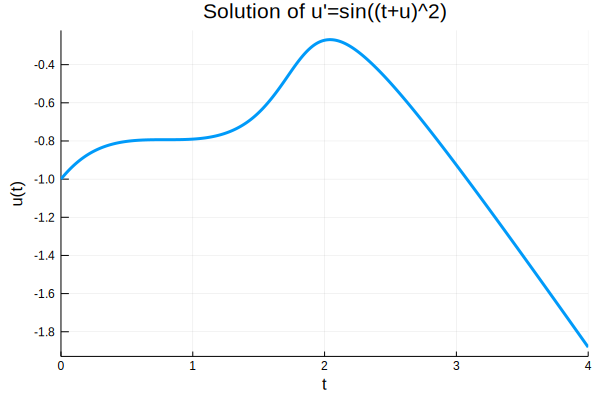

In [4]:
plot(sol,label="",ylabel="u(t)",title="Solution of u'=sin((t+u)^2)")

# Example 6.1.3

We return to the equation $u'=\sin[(u+t)^2]$ to inspect the output a bit more closely. The solution returned by `DifferntialEquations` acts like any callable function that can be evaluated at different values of $t$, or plotted.

In [5]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
sol = solve(ivp);

sol(1.0) = -0.7903205810955297
sol.(0:0.25:4) = [-1.0, -0.853363, -0.802019, -0.793338, -0.790321, -0.7588, -0.651548, -0.430972, -0.272039, -0.330268, -0.495923, -0.702115, -0.926183, -1.15896, -1.39679, -1.63778, -1.88086]


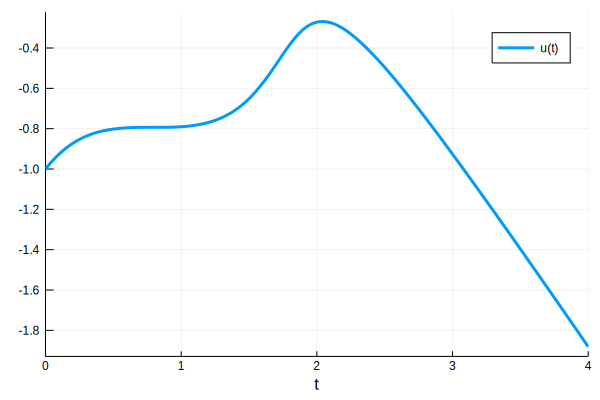

In [6]:
@show sol(1.0);
@show sol.(0:.25:4);
plot(sol,label="u(t)")

The object holds some information about how the values and plot are produced:

In [7]:
sol

retcode: Success
Interpolation: Automatic order switching interpolation
t: 15-element Array{Float64,1}:
 0.0                
 0.08678069499623003
 0.24103387371247875
 0.4646614086959207 
 0.6968261660674994 
 1.008607825256135  
 1.3746003910366258 
 1.7040585340863525 
 1.9357085145443116 
 2.1718321178638265 
 2.484273080959519  
 2.694269880034837  
 3.2703236281792836 
 3.625276287180914  
 4.0                
u: 15-element Array{Float64,1}:
 -1.0                
 -0.9348300565111116 
 -0.8566174483996657 
 -0.8056688173682979 
 -0.7936142260683786 
 -0.7899256820024289 
 -0.7186054615519162 
 -0.47684646694942473
 -0.29033311002450557
 -0.2949901746209354 
 -0.4839304627830117 
 -0.6541391656202624 
 -1.178139262445015  
 -1.5172337326105612 
 -1.880859417152323  

As you can guess from the output above, the object performs some interpolation on some discrete solution values (in this case, 15 of them). This chapter is about how the discrete $t$ and $u$ values are computed. For now, just note how we can extract them from the solution object.

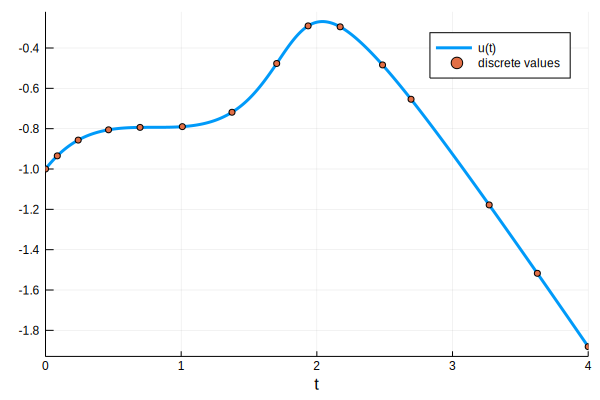

In [8]:
scatter!(sol.t,sol.u,label="discrete values")

# Example 6.1.5

The equation $u'=(u+t)^2$ gives us some trouble.

In [9]:
f = (u,t) -> (t+u)^2

using DifferentialEquations
sol = solve( ODEProblem((u,p,t)->f(u,t),1.,(0.,1.)) );

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /Users/driscoll/.julia/packages/DiffEqBase/s4c9b/src/integrator_interface.jl:156


The warning message we received can mean that there is a bug in the formulation of the problem. But if everything has been done correctly, it suggests that the solution may not exist past the indicated time. This is always a possibility in nonlinear ODEs. 

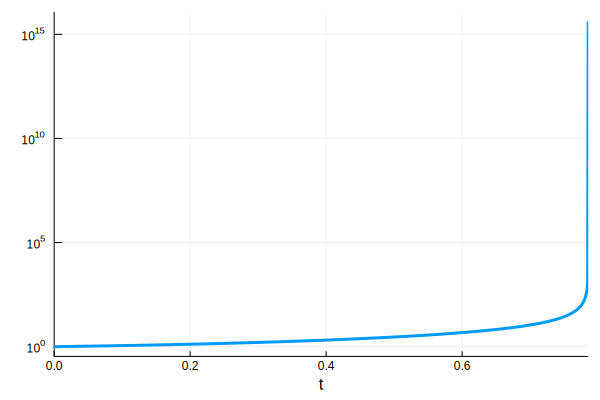

In [10]:
using Plots
plot(sol,label="",yscale=:log10)

# Example 6.1.6

Consider the ODEs $u'=u$ and $u'=-u$. In each case we compute $\partial f/\partial u = \pm 1$, so the condition number bound is $e^{(b-a)}$ in both problems. However, they behave quite differently. In the case of exponential growth, $u'=u$, the bound is the actual condition number.

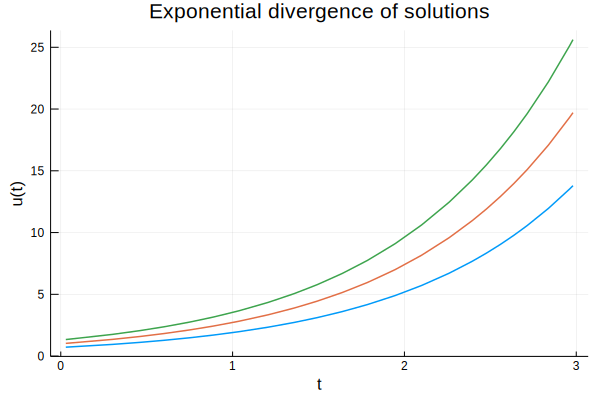

In [11]:
u = [ t->exp(t)*u0 for u0 in [0.7,1,1.3] ]
plot(u,0,3,leg=:none,xlabel="t",ylabel="u(t)", title="Exponential divergence of solutions")

But with $u'=-u$, solutions actually get closer together with time.

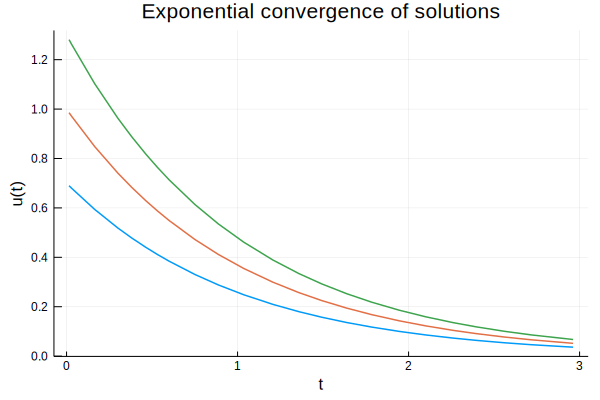

In [12]:
u = [ t->exp(-t)*u0 for u0 in [0.7,1,1.3] ]
plot(u,0,3,leg=:none,xlabel="t",ylabel="u(t)", title="Exponential convergence of solutions")

In this case the actual condition number is one, due to the difference of solutions at the initial time. 

# Example 6.2.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [13]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

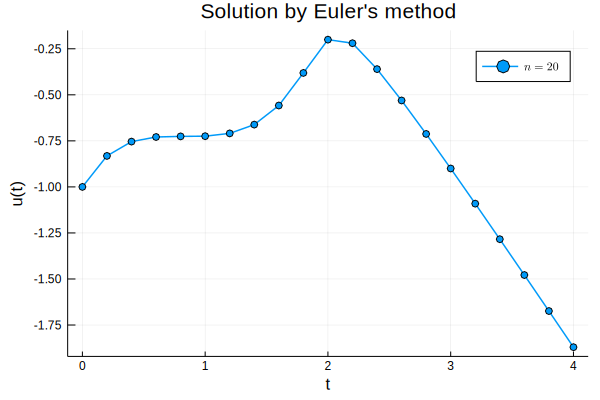

In [14]:
t,u = FNC.eulerivp(f,tspan,u0,20);
plot(t,u,m=:o,label=L"n=20",
    xlabel="t", ylabel="u(t)", title="Solution by Euler's method" )

We could define a different interpolant to get a smoother picture above, but the derivation assumed the piecewise linear interpolant, so it is the most meaningful one. We can instead request more steps to make the interpolant look smoother.

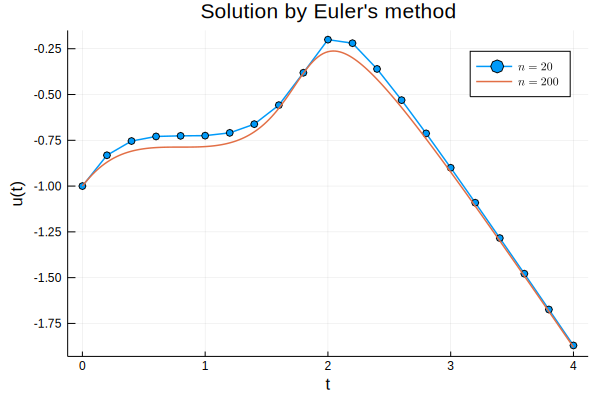

In [15]:
t,u = FNC.eulerivp(f,tspan,u0,200)
plot!(t,u,label=L"n=200")

Increasing $n$ changed the solution noticeably. Since we know that interpolants and finite differences become more accurate as $h\to 0$, we should expect that from Euler's method too.

We don't have an exact solution to compare to, so we will use a `DifferentialEquations` solver to construct an accurate solution. 

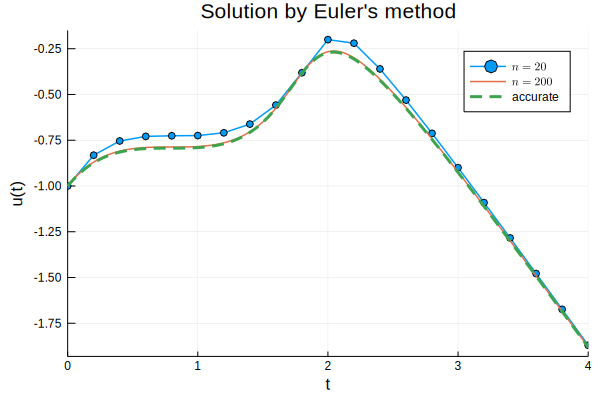

In [16]:
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
u_exact = solve(ivp,reltol=1e-14,abstol=1e-14);

plot!(u_exact,l=:dash,label="accurate")

Now we can perform a convergence study. 

In [17]:
n = @. 50*2^(0:5)
err = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = FNC.eulerivp(f,tspan,u0,n)
    err[j] = maximum( @. abs(u_exact(t)-u) )
end
DataFrame(n=n,error=err)

,n,error
,Int64,Float64
1,50,0.0299962
2,100,0.0142292
3,200,0.00694433
4,400,0.00342947
5,800,0.0017041
6,1600,0.000849416


The error is almost perfectly halved at each step, so we expect that a log-log plot will reveal first-order convergence.

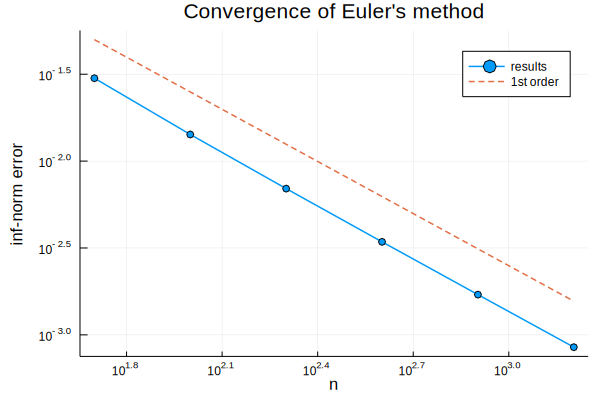

In [18]:
plot(n,err,m=:o,label="results", 
    xaxis=(:log10,"n"), yaxis=(:log10,"inf-norm error"), title="Convergence of Euler's method")
plot!(n,0.05*(n/n[1]).^(-1),l=:dash,label="1st order")

# Example 6.3.2

In [19]:
A = [ -2 5; -1 0 ]

2×2 Array{Int64,2}:
 -2  5
 -1  0

In [20]:
u0 = [1,0]
t = LinRange(0,6,600)     # times for plotting
u = zeros(length(t),length(u0))
for j=1:length(t)
    ut = exp(t[j]*A)*u0 
    u[j,:] = ut'
end

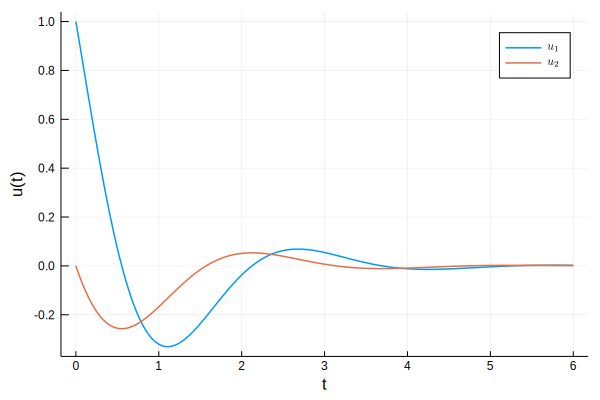

In [21]:
plot(t,u,label=[L"u_1" L"u_2"],xlabel="t",ylabel="u(t)")

# Example 6.3.3

We encode the predator–prey equations via a function. 

In [22]:
function predprey(u,p,t)
    alpha,beta = p;  y,z = u;  # rename for convenience
    s = (y*z) / (1+beta*y)     # appears in both equations
    return [ y*(1-alpha*y) - s,  -z + s ]
end

predprey (generic function with 1 method)

Note that the function accepts three inputs, `u`, `p`, and `t`, even though there is no explicit dependence on `t`. The second input is used to pass parameters that don't change throughout a single instance of the problem. 

To solve the IVP we must also provide the initial condition, which is a 2-vector here, and the interval for the independent variable.

In [23]:
u0 = [1,0.01]
tspan = (0.,80.)
alpha = 0.1;  beta = 0.25;
sol = solve( ODEProblem(predprey,u0,tspan,[alpha,beta]) );

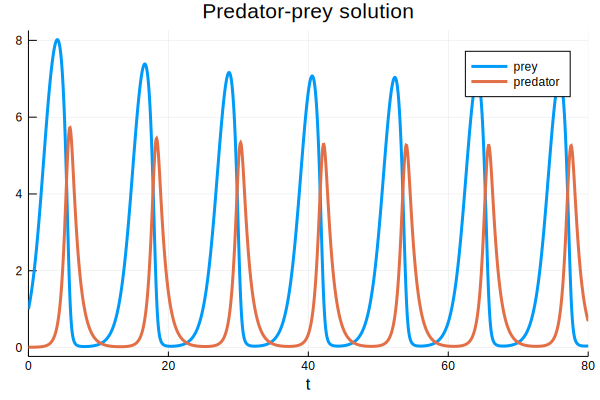

In [24]:
plot(sol,label=["prey" "predator"],title="Predator-prey solution")

We can find the discrete values used to compute the interpolated solution. The `sol.u` value is a vector of vectors, which can make manipulating the values a bit tricky. Here we convert the solution values to a matrix with two columns (one for each component).

size(sol.u) = (132,)
(sol.t[20], sol.u[20]) = (8.386622144978078, [0.0277385, 0.69947])


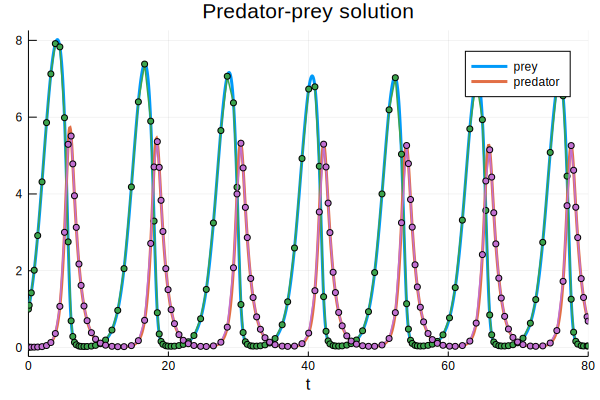

In [25]:
@show size(sol.u);
@show (sol.t[20],sol.u[20]);

u = [ sol.u[i][j] for i=1:length(sol.t), j=1:2 ]
plot!(sol.t,u,m=(:0,3),label="")

When there are just two components, it's common to plot the solution in the _phase plane_, i.e., with $u_1$ and $u_2$ along the axes and time as a parameterization of the curve.

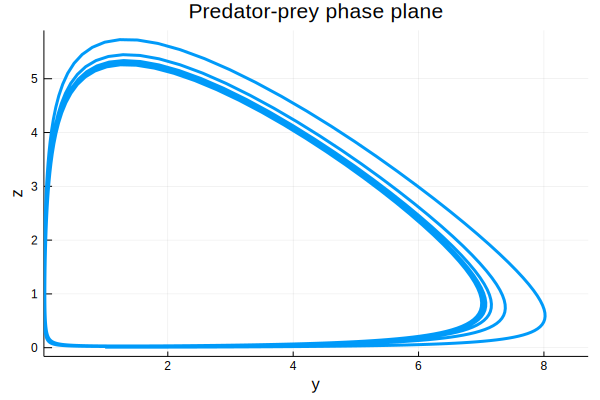

In [26]:
plot(sol,vars=(1,2),label="",
    xlabel="y",ylabel="z",title="Predator-prey phase plane")

From this plot we can deduce that the solution approaches a periodic one, which in the phase plane is reprepresented by a closed loop. 

# Example 6.4.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [27]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

We use a `DifferentialEquations` solver to construct an accurate approximation to the exact solution.

In [28]:
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
u_exact = solve(ivp,reltol=1e-14,abstol=1e-14);

Now we perform a convergence study of our two Runge--Kutta implementations.

In [29]:
n = @. 50*2^(0:5)
err_IE2 = zeros(size(n))
err_RK4 = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = FNC.ie2(f,tspan,u0,n)
    err_IE2[j] = maximum( @.abs(u_exact(t)-u) )
    t,u = FNC.rk4(f,tspan,u0,n)
    err_RK4[j] = maximum( @.abs(u_exact(t)-u) )
end

The amount of computational work at each time step is assumed to be proportional to the number of stages. Let's compare on an apples-to-apples basis by using the number of $f$-evaluations on the horizontal axis.

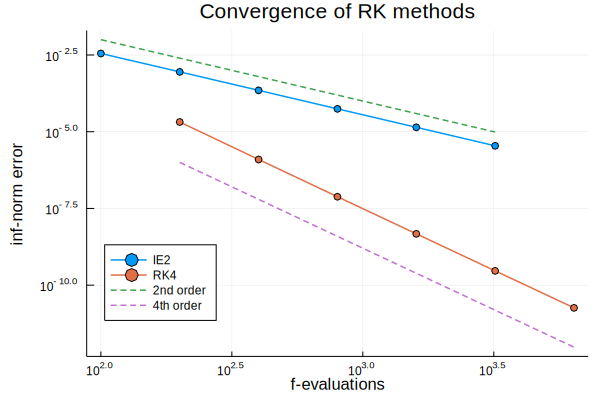

In [30]:
plot([2n 4n],[err_IE2 err_RK4],m=:o,label=["IE2" "RK4"],
    xaxis=(:log10,"f-evaluations"),yaxis=(:log10,"inf-norm error"),
    title="Convergence of RK methods",leg=:bottomleft)
plot!(2n,0.01*(n/n[1]).^(-2),l=:dash,label="2nd order")
plot!(4n,1e-6*(n/n[1]).^(-4),l=:dash,label="4th order")

The fourth-order variant is more efficient in this problem over a wide range of accuracy.

# Example 6.5.1

Let's run adaptive RK on  $u'=e^{t-u\sin u}$. 

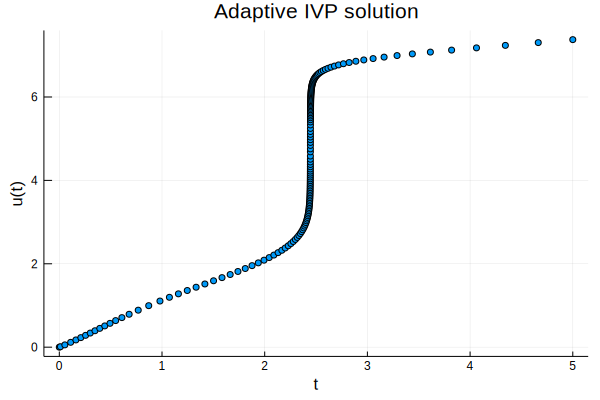

In [31]:
f = (u,t) -> exp(t-u*sin(u))
t,u = FNC.rk23(f,[0.,5.],0.0,1e-5)
scatter(t,u,label="",
    xlabel="t",ylabel="u(t)",title="Adaptive IVP solution")

The solution makes a very abrupt change near $t=2.4$. The resulting time steps vary over three orders of magnitude.

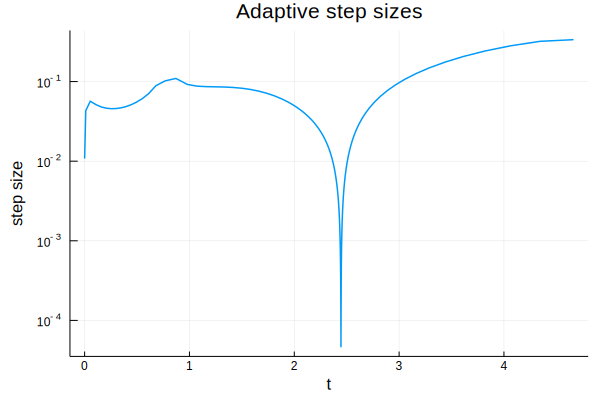

In [32]:
plot(t[1:end-1],diff(t),label="",
    xaxis=("t"),yaxis=(:log10,"step size"),title=("Adaptive step sizes"))

If we had to run with a uniform step size to get this accuracy, it would be

In [33]:
h_min = minimum(diff(t))

4.6096854609878335e-5

On the other hand, the average step size that was actually taken was

In [34]:
h_avg = sum(diff(t))/(length(t)-1)

0.03205128205128205

We took fewer steps by a factor of almost 1000! Even accounting for the extra stage per step and the occasional rejected step, the savings are clear.

# Example 6.5.2

In [35]:
f = (u,t) -> (t+u)^2;
t,u = FNC.rk23(f,[0,1],1.0,1e-5);

┌ Warning: Stepsize too small near t=0.785408720407281
└ @ Main.FNC /Users/driscoll/Dropbox/books/fnc-extras/julia/functions/chapter06.jl:117


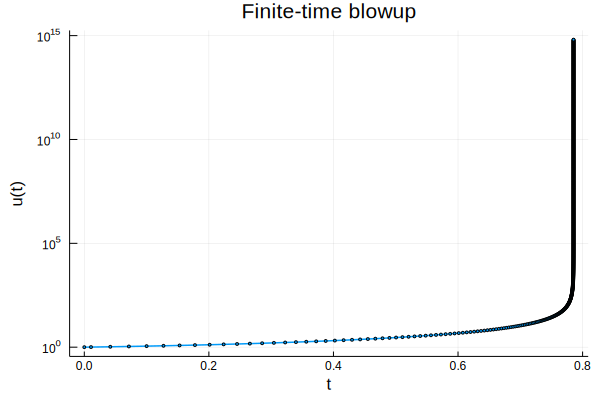

In [36]:
plot(t,u,m=(:o,1),label="",
    xlabel="t",yaxis=(:log10,"u(t)"),title="Finite-time blowup")

# Example 6.7.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [37]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

We use a solver from `DifferentialEquations` to construct an accurate approximation to the exact solution.

In [38]:
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
u_exact = solve(ivp,reltol=1e-14,abstol=1e-14);

Now we perform a convergence study of the AB4 code. 

In [39]:
n = @. 10*2^(0:5)
err = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = FNC.ab4(f,tspan,u0,n)
    err[j] = maximum( @.abs(u_exact(t)-u) )
end

The method should converge as $O(h^4)$, so a log-log scale is appropriate for the errors. 

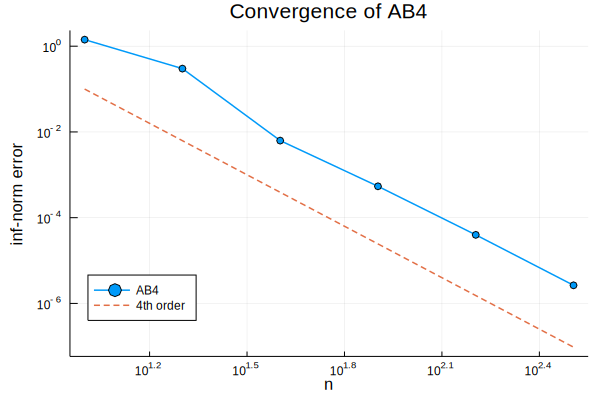

In [40]:
plot(n,err,m=:o,label="AB4",
    xaxis=(:log10,"n"),yaxis=(:log10,"inf-norm error"),
    title="Convergence of AB4",leg=:bottomleft)
plot!(n,0.1*(n/n[1]).^(-4),l=:dash,label="4th order")

# Example 6.7.2

The following simple ODE uncovers a surprise. 

In [41]:
f = (u,t) -> u^2 - u^3;
u0 = 0.005;

We will solve the problem first with the implicit AM2 method using $n=200$ steps.

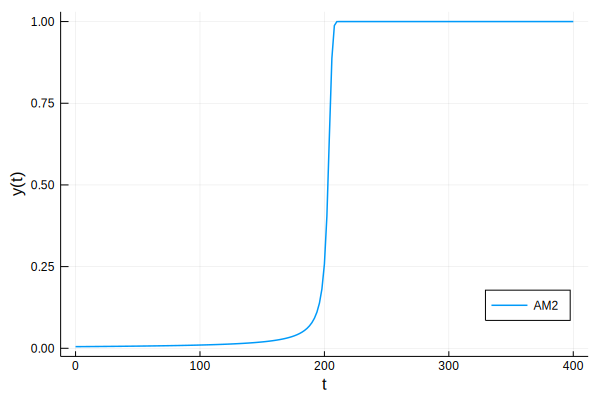

In [42]:
tI,uI = FNC.am2(f,[0.,400.],u0,200);
plot(tI,uI,label="AM2",
    xlabel="t",ylabel="y(t)",leg=:bottomright)

Now we repeat the process using the explicit AB4 method.

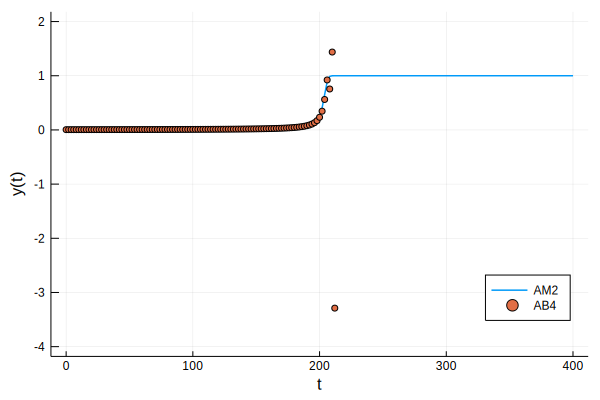

In [43]:
tE,uE = FNC.ab4(f,[0.,400.],u0,200);
scatter!(tE,uE,label="AB4",ylim=[-4,2])

Once the solution starts to take off, the AB4 result goes catastrophically wrong.

In [44]:
uE[105:111]

7-element Array{Float64,1}:
   0.7553857798343923   
   1.4372970308402562   
  -3.2889768512289934   
 214.1791132643978      
  -4.482089146771584e7  
   4.1268902909420876e23
  -3.221441244795439e71 

We hope that AB4 will converge in the limit $h\to 0$, so let's try using more steps.

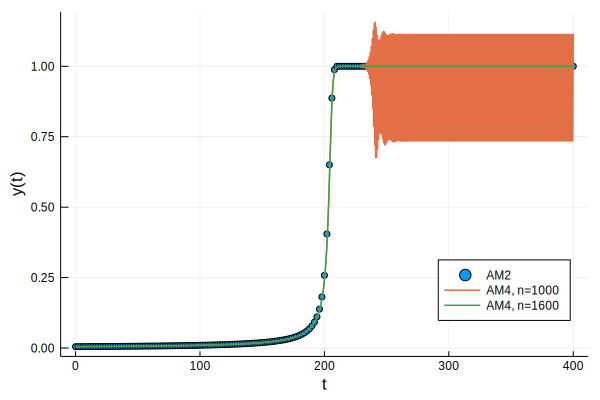

In [45]:
plt = scatter(tI,uI,label="AM2",
    xlabel="t",ylabel="y(t)",leg=:bottomright)

for n = [1000,1600]
    tE,uE = FNC.ab4(f,[0 400],u0,n);
    plot!(tE,uE,label="AM4, n=$n")
end
display(plt)

So AB4, which is supposed to be _more_ accurate than AM2, actually needs something like 8 times as many steps to get a reasonable-looking answer!

# Example 6.8.1

Consider the ridiculously simple IVP $u'=u$, $u(0)=1$, whose solution is $e^t$. 

In [46]:
dudt = (u,t) -> u;
u_exact = exp;
a = 0.0;  b = 1.0;

Let's apply the LIAF method to this problem for varying fixed step sizes. We'll measure the error at the time $t=1$. 

In [47]:
n = [5,10,20,40,60]
err = zeros(size(n))
t = [];  u = [];
for (j,n) = enumerate(n)
    h = (b-a)/n
    t = [ a + i*h for i=0:n ]
    u = [1; u_exact(h); zeros(n-1)];
    f = [dudt(u[1],t[1]); zeros(n)];
    for i = 2:n
        f[i] = dudt(u[i],t[i])
        u[i+1] = -4*u[i] + 5*u[i-1] + h*(4*f[i]+2*f[i-1])
    end
    err[j] = abs(u_exact(b) - u[end])
end
DataFrame(n=n,h=(b-a)./n,error=err)    

,n,h,error
,Int64,Float64,Float64
1,5,0.2,0.0160452
2,10,0.1,2.84548
3,20,0.05,1.6225e6
4,40,0.025,9.3442e18
5,60,0.0166667,1.74013e32


The error starts out promisingly, but things explode from there. A graph of the last numerical attempt yields a clue.

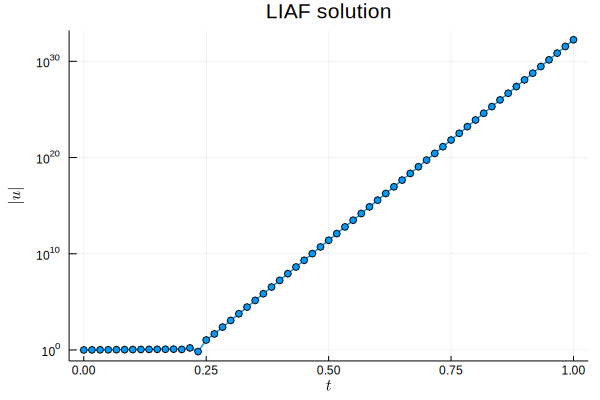

In [48]:
plot(t,abs.(u),m=:o,label="",
    xlabel=L"t",yaxis=(:log10,L"|u|"),title="LIAF solution")

It's clear that the solution is growing exponentially in time.